<a href="https://colab.research.google.com/github/arthur-siqueira/metodos-numericos/blob/main/exercicio_vetores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exercise 2.1**

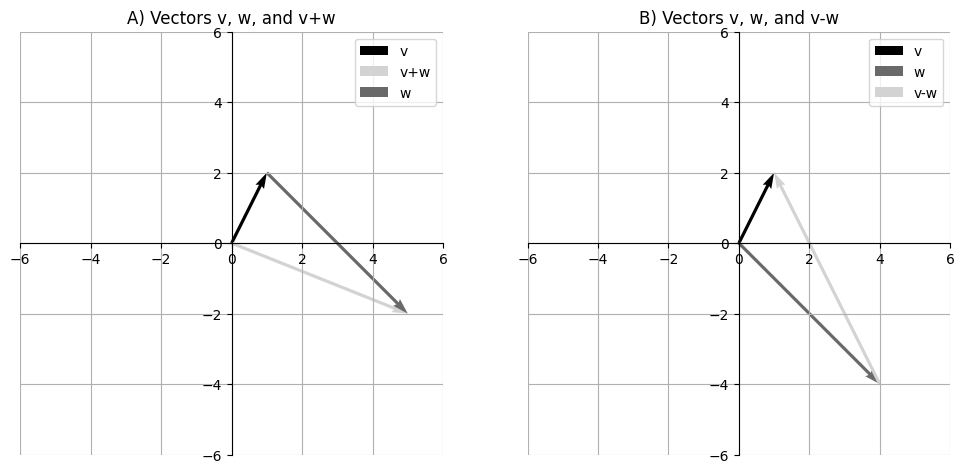

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Definição dos Vetores ---
# Com base na análise visual do gráfico:
# Vetor v vai da origem (0,0) até o ponto (1,2)
v = np.array([1, 2])

# Vetor w vai da origem (0,0) até o ponto (4,-4)
w = np.array([4, -4])


# --- 2. Cálculos dos Vetores Resultantes ---
# Soma: v + w
v_plus_w = v + w

# Diferença: v - w
v_minus_w = v - w


# --- 3. Criação dos Gráficos ---
# Cria uma figura com dois subplots, um ao lado do outro
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# --- Gráfico A: Soma de Vetores ---
ax1.set_title('A) Vectors v, w, and v+w')

# Desenha os vetores v e v+w a partir da origem (0,0)
ax1.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='black', label='v')
ax1.quiver(0, 0, v_plus_w[0], v_plus_w[1], angles='xy', scale_units='xy', scale=1, color='lightgray', label='v+w')

# Para a soma, o vetor w começa na ponta do vetor v (regra cabeça-à-cauda)
ax1.quiver(v[0], v[1], w[0], w[1], angles='xy', scale_units='xy', scale=1, color='dimgray', label='w') # <-- ALTERAÇÃO


# --- Gráfico B: Diferença de Vetores ---
ax2.set_title('B) Vectors v, w, and v-w')

# Desenha os vetores v e w a partir da origem (0,0)
ax2.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='black', label='v')
ax2.quiver(0, 0, w[0], w[1], angles='xy', scale_units='xy', scale=1, color='dimgray', label='w')

# Para a diferença, o vetor v-w começa na ponta do vetor w e termina na ponta de v
ax2.quiver(w[0], w[1], v_minus_w[0], v_minus_w[1], angles='xy', scale_units='xy', scale=1, color='lightgray', label='v-w') # <-- ALTERAÇÃO


# --- 4. Estilização de Ambos os Gráficos ---
# Aplica as mesmas configurações de estilo para os dois subplots
for ax in [ax1, ax2]:
    ax.set_xlim(-6, 6)
    ax.set_ylim(-6, 6)
    ax.set_xticks(np.arange(-6, 7, 2))
    ax.set_yticks(np.arange(-6, 7, 2))
    ax.grid(True)
    ax.set_aspect('equal', adjustable='box') # Garante que a escala de x e y seja a mesma
    ax.legend()

# Posiciona os eixos no centro para se parecer com o original
for ax in [ax1, ax2]:
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

# Exibe o gráfico final
plt.show()

**Exercise 2-2**

In [26]:
def calcular_norma(v):
  """
  Calcula a norma (magnitude) de um vetor usando a fórmula Euclidiana.

  Args:
    v: Um array Numpy representando o vetor.

  Returns:
    A norma do vetor com um float.
  """

  soma_dos_quadrados = np.sum(v**2)

  norma = np.sqrt(soma_dos_quadrados)

  return norma

print("Testando com vetores aleatórios")

# Vetor aleatório com 3 dimensões
v1 = np.array([3, 4, 0])
minha_norma1 = calcular_norma(v1)
numpy_norma1 = np.linalg.norm(v1)
print(f"\nVetor 1: {v1}")
print(f"Minha função: {minha_norma1}")
print(f"Função NumPy:  {numpy_norma1}")
print(f"Resultados são iguais? {np.isclose(minha_norma1, numpy_norma1)}")

# Vetor aleatório com 5 dimensões
v2 = np.random.randint(-10, 10, size=5)
minha_norma2 = calcular_norma(v2)
numpy_norma2 = np.linalg.norm(v2)

print(f"\nVetor 2: {v2}")
print(f"Minha função: {minha_norma2}")
print(f"Função NumPy:  {numpy_norma2}")
print(f"Resultados são iguais? {np.isclose(minha_norma2, numpy_norma2)}")

# Vetor aleatório com 10 dimensões
v3 = np.random.rand(10) * 100 # Vetor com floats
minha_norma3 = calcular_norma(v3)
numpy_norma3 = np.linalg.norm(v3)

print(f"\nVetor 3 (com floats): {v3.round(2)}")
print(f"Minha função: {minha_norma3}")
print(f"Função NumPy:  {numpy_norma3}")
print(f"Resultados são iguais? {np.isclose(minha_norma3, numpy_norma3)}")

Testando com vetores aleatórios

Vetor 1: [3 4 0]
Minha função: 5.0
Função NumPy:  5.0
Resultados são iguais? True

Vetor 2: [2 1 8 6 6]
Minha função: 11.874342087037917
Função NumPy:  11.874342087037917
Resultados são iguais? True

Vetor 3 (com floats): [90.2  54.35 79.3  67.34 44.4  28.    1.13 45.12 36.81 77.8 ]
Minha função: 184.69747053672666
Função NumPy:  184.69747053672666
Resultados são iguais? True


**Exercise 2-3**

In [27]:
def vetor_unitario(v):
    """
    Calcula o vetor unitário na mesma direção do vetor de entrada.

    Args:
        v: Um array NumPy representando o vetor.

    Returns:
        Um array NumPy representando o vetor unitário, ou o próprio vetor
        se a entrada for o vetor nulo.
    """
    # Calcula a norma do vetor
    norma = np.linalg.norm(v)

    # Caso especial: o vetor nulo
    if norma == 0:
        # A divisão por zero é indefinida. Retornamos o próprio vetor nulo.
        return v

    # Retorna o vetor dividido pela sua norma
    return v / norma

# Teste com um vetor normal
v_teste = np.array([3, 4])
unit_v = vetor_unitario(v_teste)
norma_do_unitario = np.linalg.norm(unit_v)

print("--- Testando a função de vetor unitário ---")
print(f"\nVetor original: {v_teste}")
print(f"Vetor unitário: {unit_v}")
print(f"Norma do vetor unitário resultante: {norma_do_unitario:.2f}") # Deve ser 1.0

# Teste com o vetor nulo
v_zeros = np.array([0, 0, 0])
unit_zeros = vetor_unitario(v_zeros)

print(f"\nVetor original: {v_zeros}")
print(f"Resultado para o vetor nulo: {unit_zeros}")

--- Testando a função de vetor unitário ---

Vetor original: [3 4]
Vetor unitário: [0.6 0.8]
Norma do vetor unitário resultante: 1.00

Vetor original: [0 0 0]
Resultado para o vetor nulo: [0 0 0]


**Exercise 2-4**

In [28]:
def criar_vetor_com_magnitude(v, mag_desejada):
    """
    Cria um novo vetor na mesma direção de v mas com uma magnitude específica.
    """
    # Calcula a norma (magnitude) do vetor de entrada
    norma_v = np.linalg.norm(v)

    # Evita divisão por zero se o vetor de entrada for o vetor nulo
    if norma_v == 0:
        print("Aviso: Vetor nulo de entrada. Retornando um vetor nulo.")
        return v

    # Calcula o vetor unitário e o escala pela magnitude desejada
    v_novo = v / norma_v * mag_desejada
    return v_novo

# Demonstração
v = np.array([1, 2, 3])
mag_original = np.linalg.norm(v)
mag_desejada = 10

v_novo = criar_vetor_com_magnitude(v, mag_desejada)
mag_nova = np.linalg.norm(v_novo)

print(f"Vetor Original: {v}, Magnitude Original: {mag_original:.2f}")
print(f"Vetor Novo: {v_novo}, Magnitude Nova: {mag_nova:.2f}")

Vetor Original: [1 2 3], Magnitude Original: 3.74
Vetor Novo: [2.67261242 5.34522484 8.01783726], Magnitude Nova: 10.00


**Exercise 2-5**

In [29]:
def transpor_manual(v_linha):
    """
    Transpõe um vetor linha 1D para um vetor coluna 2D.
    """
    # Cria um array 2D de zeros com o formato (n, 1)
    v_coluna = np.zeros((len(v_linha), 1))

    # Itera sobre o vetor linha para preencher o vetor coluna
    for i in range(len(v_linha)):
        v_coluna[i, 0] = v_linha[i]

    return v_coluna

# Demonstração
v_linha = np.array([1, 2, 3, 4])
v_coluna = transpor_manual(v_linha)

print(f"Vetor Linha Original (shape {v_linha.shape}):\n{v_linha}")
print(f"Vetor Coluna Transposto (shape {v_coluna.shape}):\n{v_coluna}")

Vetor Linha Original (shape (4,)):
[1 2 3 4]
Vetor Coluna Transposto (shape (4, 1)):
[[1.]
 [2.]
 [3.]
 [4.]]


**Exercise 2-6**

In [30]:
# Demonstração
v = np.array([2, 5, -3, 1])

norma_ao_quadrado = np.linalg.norm(v)**2
produto_escalar_consigo = np.dot(v, v)

print(f"Vetor: {v}")
print(f"Norma ao Quadrado: {norma_ao_quadrado}")
print(f"Produto Escalar consigo mesmo: {produto_escalar_consigo}")
print(f"Os resultados são iguais? {np.isclose(norma_ao_quadrado, produto_escalar_consigo)}")

Vetor: [ 2  5 -3  1]
Norma ao Quadrado: 39.0
Produto Escalar consigo mesmo: 39
Os resultados são iguais? True


**Exercise 2-7**

In [31]:
# Demonstração
a = np.random.randn(5)
b = np.random.randn(5)

aTb = np.dot(a, b)
bTa = np.dot(b, a)

print(f"a.T * b = {aTb:.4f}")
print(f"b.T * a = {bTa:.4f}")
print(f"Os resultados são iguais? {np.isclose(aTb, bTa)}")

a.T * b = 1.0111
b.T * a = 1.0111
Os resultados são iguais? True


**Exercise 2-8**

Gerando gráfico da projeção vetorial...


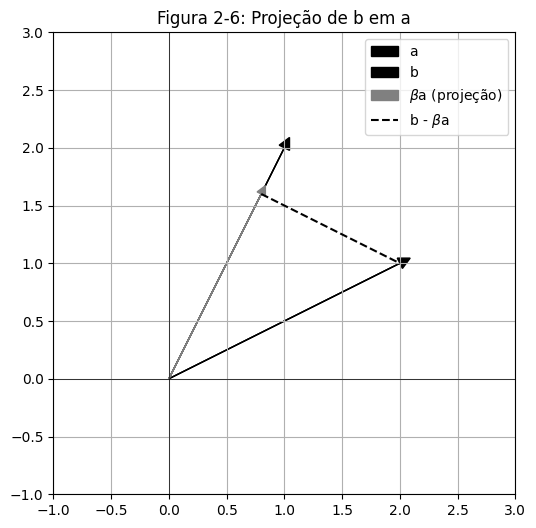

In [32]:
# Demonstração
a = np.array([1, 2])
b = np.array([2, 1])

# Calcular beta (escalar da projeção)
beta = np.dot(a, b) / np.dot(a, a)

# Calcular o vetor de projeção
proj_b_em_a = beta * a

# Componente perpendicular
perp_comp = b - proj_b_em_a

print("Gerando gráfico da projeção vetorial...")

plt.figure(figsize=(6, 6))
# Plota os vetores a e b
plt.arrow(0, 0, a[0], a[1], head_width=0.1, head_length=0.1, fc='k', ec='k', label='a')
plt.arrow(0, 0, b[0], b[1], head_width=0.1, head_length=0.1, fc='k', ec='k', label='b')

# Plota o vetor de projeção
plt.arrow(0, 0, proj_b_em_a[0], proj_b_em_a[1], head_width=0.08, head_length=0.08, fc='gray', ec='gray', label=r'$\beta$a (projeção)')

# Plota a linha do componente perpendicular
plt.plot([proj_b_em_a[0], b[0]], [proj_b_em_a[1], b[1]], 'k--', label=r'b - $\beta$a')

plt.xlim(-1, 3)
plt.ylim(-1, 3)
plt.grid()
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.title("Figura 2-6: Projeção de b em a")
plt.show()

**Exercise 2-9**

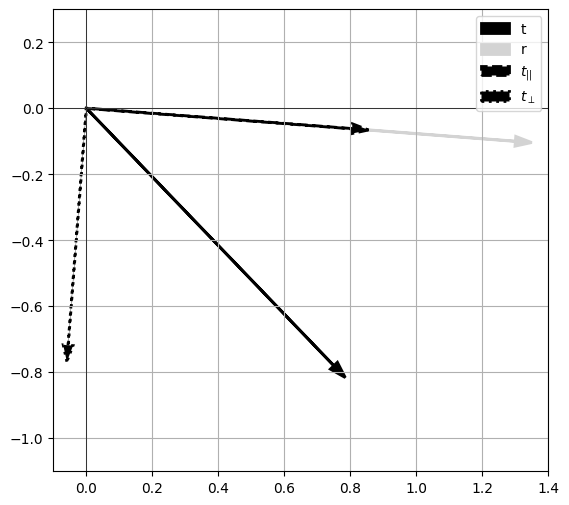

In [33]:
t = np.array([0.75, -0.78])
r = np.array([1.3, -0.1])

# 1. Cálculo dos componentes
t_par = r * (np.dot(r, t) / np.dot(r, r))
t_perp = t - t_par

fig, ax = plt.subplots(figsize=(8, 6))

# Plota o vetor t
ax.arrow(0, 0, t[0], t[1], head_width=0.03, head_length=0.05, fc='black', ec='black', linewidth=2, label='t')

# Plota o vetor r
ax.arrow(0, 0, r[0], r[1], head_width=0.03, head_length=0.05, fc='lightgray', ec='lightgray', linewidth=2, label='r')

# Plota o componente paralelo t_par
ax.arrow(0, 0, t_par[0], t_par[1], head_width=0.03, head_length=0.05, fc='black', ec='black', linestyle='--', linewidth=2, label=r'$t_{||}$')

# Plota o componente perpendicular t_perp
ax.arrow(0, 0, t_perp[0], t_perp[1], head_width=0.03, head_length=0.05, fc='black', ec='black', linestyle=':', linewidth=2, label=r'$t_{\perp}$')

ax.set_xlim(-0.1, 1.4)
ax.set_ylim(-1.1, 0.3)
ax.grid(True)
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.set_aspect('equal', adjustable='box')
ax.legend(loc='upper right')

plt.show()

**Exercise 2-10**

In [34]:
# Cálculo do componente paralelo COM O BUG
t_par_bug = r * (np.dot(r, t) / np.dot(t, t)) # Denominador errado

# Cálculo do componente perpendicular com base no componente bugado
t_perp_bug = t - t_par_bug

print(f"Componente Paralelo com Bug: {t_par_bug}")
print(f"Componente Perpendicular com Bug: {t_perp_bug}")

# Sanity-Check: O componente perpendicular é ortogonal a r?
# o resultado correto para comparação
dot_correto = np.dot(t_perp, r)
# resultado com bug
dot_bugado = np.dot(t_perp_bug, r)

print("\n--- Verificação de Sanidade (Sanity-Check) ---")
print("Um resultado correto deve ter o produto escalar entre t_perp e r igual a zero.")
print(f"Produto Escalar CORRETO (t_perp . r): {dot_correto:.15f}")
print(f"Produto Escalar COM BUG (t_perp_bug . r): {dot_bugado:.15f}")

if not np.isclose(dot_bugado, 0):
    print("\nConclusão: O Sanity-Check FALHOU. O produto escalar não é zero, provando que o código com bug está incorreto.")
else:
    print("\nConclusão: O Sanity-Check PASSOU. Isto seria inesperado.")

Componente Paralelo com Bug: [ 1.16910069 -0.08993082]
Componente Perpendicular com Bug: [-0.41910069 -0.69006918]

--- Verificação de Sanidade (Sanity-Check) ---
Um resultado correto deve ter o produto escalar entre t_perp e r igual a zero.
Produto Escalar CORRETO (t_perp . r): 0.000000000000000
Produto Escalar COM BUG (t_perp_bug . r): -0.475823981552652

Conclusão: O Sanity-Check FALHOU. O produto escalar não é zero, provando que o código com bug está incorreto.


**Exercise 3-1**

In [35]:
s1, s2, s3 = 2, -3, 5
v1 = np.array([4, 1, 0])
v2 = np.array([-1, 3, 2])
v3 = np.array([0, -2, 1])

resultado_direto = s1*v1 + s2*v2 + s3*v3

print(f"Cálculo direto (sem loop): {resultado_direto}")

escalares = [s1, s2, s3]
vetores = [v1, v2, v3]

dimensao = vetores[0].shape
resultado_com_loop = np.zeros(dimensao)

for escalar, vetor in zip(escalares, vetores):
    resultado_com_loop += escalar * vetor # Acumula o resultado

print(f"Cálculo com loop:         {resultado_com_loop}")

sao_iguais = np.allclose(resultado_direto, resultado_com_loop)

print(f"\nOs resultados são os mesmos? {sao_iguais}")

Cálculo direto (sem loop): [ 11 -17  -1]
Cálculo com loop:         [ 11. -17.  -1.]

Os resultados são os mesmos? True


**Exercise 3-2**

In [36]:
print("Dimensões Diferentes")

# Listas com um vetor de dimensão errada
escalares_dim = [2, -3, 5, 4]
vetores_dim = [
    np.array([4, 1, 0]),     # R³
    np.array([-1, 3, 2]),    # R³
    np.array([0, -2, 1]),    # R³
    np.array([1, 2, 3, 4])   # R⁴ <-- Vetor com dimensão diferente
]

# Inicializa o resultado com base no primeiro vetor (R³)
resultado_dim = np.zeros(vetores_dim[0].shape)

try:
    for escalar, vetor in zip(escalares_dim, vetores_dim):
        print(f"Adicionando {escalar} * {vetor}")
        resultado_dim += escalar * vetor
except ValueError as e:
    print("\nERRO CAPTURADO!")
    print(f"Mensagem de erro do NumPy: {e}")
    print("\nExplicação: O erro ocorreu ao tentar somar um vetor de R⁴ ao nosso vetor de resultado, que é R³.")
    print("A adição de vetores com dimensões diferentes não é permitida.")

Dimensões Diferentes
Adicionando 2 * [4 1 0]
Adicionando -3 * [-1  3  2]
Adicionando 5 * [ 0 -2  1]
Adicionando 4 * [1 2 3 4]

ERRO CAPTURADO!
Mensagem de erro do NumPy: operands could not be broadcast together with shapes (3,) (4,) (3,) 

Explicação: O erro ocorreu ao tentar somar um vetor de R⁴ ao nosso vetor de resultado, que é R³.
A adição de vetores com dimensões diferentes não é permitida.


In [37]:
print("Mais Escalares que Vetores")

# 4 escalares e 3 vetores
escalares_mais = [2, -3, 5, 999] # O último escalar (999) será ignorado
vetores_menos = [
    np.array([4, 1, 0]),
    np.array([-1, 3, 2]),
    np.array([0, -2, 1])
]

resultado_esc_mais = np.zeros(vetores_menos[0].shape)

for escalar, vetor in zip(escalares_mais, vetores_menos):
    print(f"Usando escalar {escalar} e vetor {vetor}")
    resultado_esc_mais += escalar * vetor

print(f"\nResultado final: {resultado_esc_mais}")
print("Explicação: O laço parou após o terceiro par, pois a lista de vetores acabou.")
print("O escalar '999' nunca foi usado.")

Mais Escalares que Vetores
Usando escalar 2 e vetor [4 1 0]
Usando escalar -3 e vetor [-1  3  2]
Usando escalar 5 e vetor [ 0 -2  1]

Resultado final: [ 11. -17.  -1.]
Explicação: O laço parou após o terceiro par, pois a lista de vetores acabou.
O escalar '999' nunca foi usado.
